<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees
 
_Author: Joseph Nelson (DC)_

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Intro to Decision Tree Regression

**Exercise (6 mins., in pairs).**

- Build a decision tree regression model on the Ames housing dataset at `../assets/data/ames_train.csv`. (You will need to import `DecisionTreeRegressor` from scikit-learn's `tree` module.) Do a simple train/test split, train on all numeric features without null values, and get R2 values for both the training set and the test set.

In [2]:
# /scrub/
ames_df = pd.read_csv('../assets/data/ames_train.csv')

In [3]:
target_col = 'SalePrice'
X = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns')
X = X.drop(target_col, axis='columns')

In [4]:
# /scrub/
y = ames_df.loc[:, target_col]

In [5]:
# /scrub/
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# /scrub/
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

1.0
0.8101991230848091


- Is the model overfitting, underfitting, both, or neither? How do you know?

It is overfitting -- it performs perfectly or nearly perfectly on the training set but does substantially worse on the test set.

- **BONUS:** Create a `DecisionTreeRegressor` estimator that gets a better score on the test set.

$\blacksquare$

Let's see how a decision tree regressor for the Ames dataset works. (Warning: We have had some trouble getting the `graphviz` tool to work on Windows. If it doesn't "just work" for you, you can sit back and watch.)

In [7]:
# /scrub/
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

ames_df = pd.read_csv('../assets/data/ames_train.csv')

target_col = 'SalePrice'
X = ames_df.select_dtypes(['int64', 'float64']).dropna(axis='columns')
X = X.drop(target_col, axis='columns')
y = ames_df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y)

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

print(dtr.score(X_train, y_train))
print(dtr.score(X_test, y_test))

0.7662238820880968
0.5296025140849824


In [8]:
# Install tool to generate tree diagrams
!conda install -y graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.4
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [9]:
# Set up paths for tree diagram files
images_dir = '../assets/images'
dotfile_path = f'{images_dir}/ames_tree.dot'
png_path = f'{images_dir}/ames_tree.png'

In [10]:
# Create a tree diagram as a Graphviz file.
from sklearn.tree import export_graphviz

export_graphviz(dtr, out_file=dotfile_path, feature_names=X.columns)

In [11]:
# Convert the graphviz file to PNG
!dot -Tpng {dotfile_path} -o {png_path}

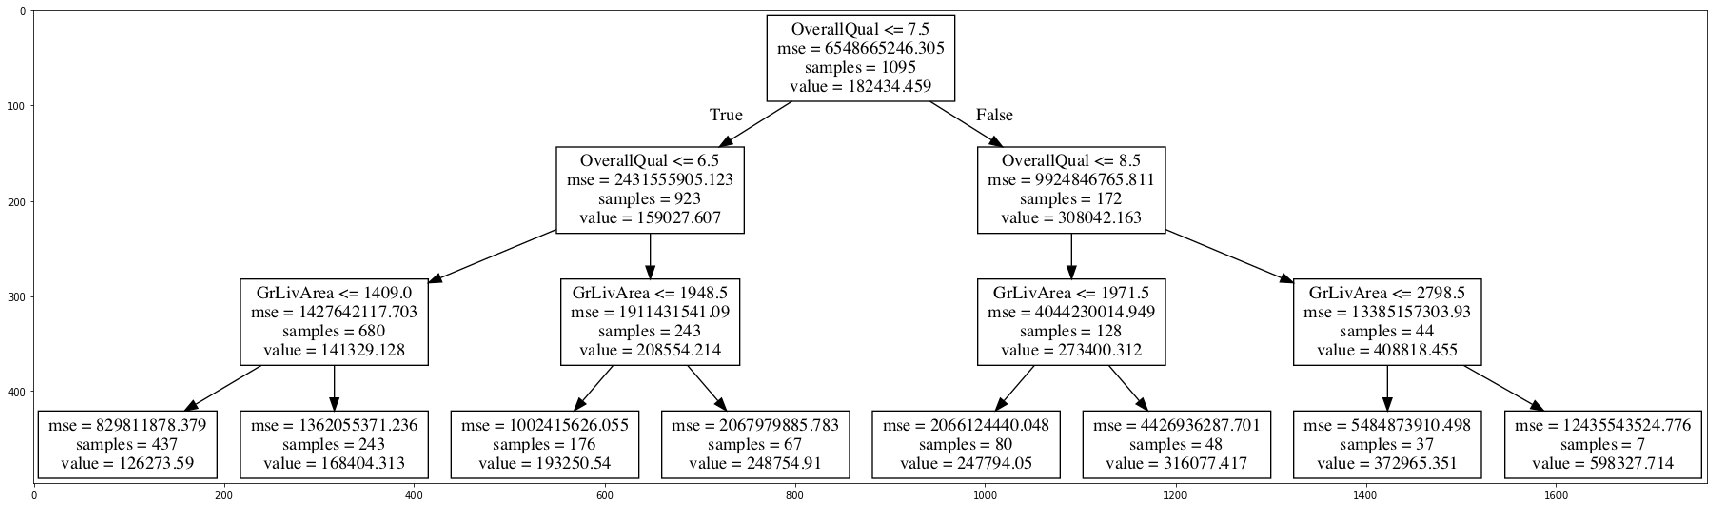

In [12]:
# Show the PNG
# /scrub/
tree_image = plt.imread(png_path)
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(tree_image);

A decision tree is like a player of the game 20 Questions. It asks a sequence of yes/no questions about the features of a given item. It learns the average value of the target variable for each of the resulting "leaf nodes" and predicts that average value for each item in the test set that falls into that leaf node.

**Exercise (2 mins.)**

- What price would this model predict for a house with lot area 25,000 sq. ft., second floor area 2,000 sq. ft., and overall quality score 8?

/scrub/

$750k

- What price would this model predict for a house with overall quality score 5 and above-grade living area 15,000 sq. ft.?

/scrub/
$167,397

$\blacksquare$

**Notes**

- A decision tree can create a three-way split (or more) by splitting on the same variable more than once.
- Just like a player in 20 Questions, a decision tree can ask different questions depending on the answers it received to previous questions. In this way, it can **learn interactions**.
- Decision tree regressors are trying to reduce MSE as much as possible at every split, so **the variables that appear at the top of the tree are the most informative**.
- The model you build for the exercise didn't have `max_depth=3`, so it built a deeper tree. That additional complexity allowed it to overfit. **Reducing `max_depth` increases bias and decreases variance.**

## Intro to Decision Tree Classification

**Exercise (5 mins., in pairs).**

- Build a decision tree regression model on the Titanic dataset at `../assets/data/titanic.csv`. (You will need to import `DecisionTreeClassifier` from scikit-learn's `tree` module.) Do a simple train/test split, train on all numeric features without null values, and get R2 values for both the training set and the test set.

In [13]:
# /scrub/
titanic = pd.read_csv('../assets/data/titanic.csv')

In [14]:
# /scrub/
target_col = 'Survived'
X = titanic.select_dtypes(['int64', 'float64']).dropna(axis='columns')
X = X.drop(target_col, axis='columns')
y = titanic.loc[:, target_col]

In [15]:
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
# /scrub/
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

1.0
0.6143497757847534


- Is the model overfitting, underfitting, both, or neither? How do you know?

/scrub/

It is overfitting -- it performs perfectly or nearly perfectly on the training set but does substantially worse on the test set.

- **BONUS:** Modify the model to get a better score on the test set.

$\blacksquare$

Let's see how a decision tree classifier for the Titanic dataset works. This time, let's use the categorical features.

In [17]:
# Load the data
# /scrub/
titanic = pd.read_csv('../assets/data/titanic.csv')

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Inspect the data
# /scrub/
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# Pick out useful feature columns
# /scrub/
X = titanic.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [21]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [22]:
# dummy-code categorical features
# /scrub/
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [23]:
# Impute median age
# /scrub/
X.loc[:, 'Age'] = X.loc[:, 'Age'].fillna(X.loc[:, 'Age'].median())

In [24]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [25]:
# Pull out target column
# /scrub/
y = titanic.loc[:, target_col]

In [26]:
# Do train/test split
# /scrub/
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# Fit and score model
# /scrub/
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8158682634730539
0.8609865470852018


In [28]:
# Set up paths for tree diagram files
dotfile_path = f'{images_dir}/titanic_tree.dot'
png_path = f'{images_dir}/titanic_tree.png'

In [29]:
# Create a tree diagram as a Graphviz file.
from sklearn.tree import export_graphviz

export_graphviz(dtc, out_file=dotfile_path, feature_names=X.columns)

In [30]:
# Convert the graphviz file to PNG
!dot -Tpng {dotfile_path} -o {png_path}

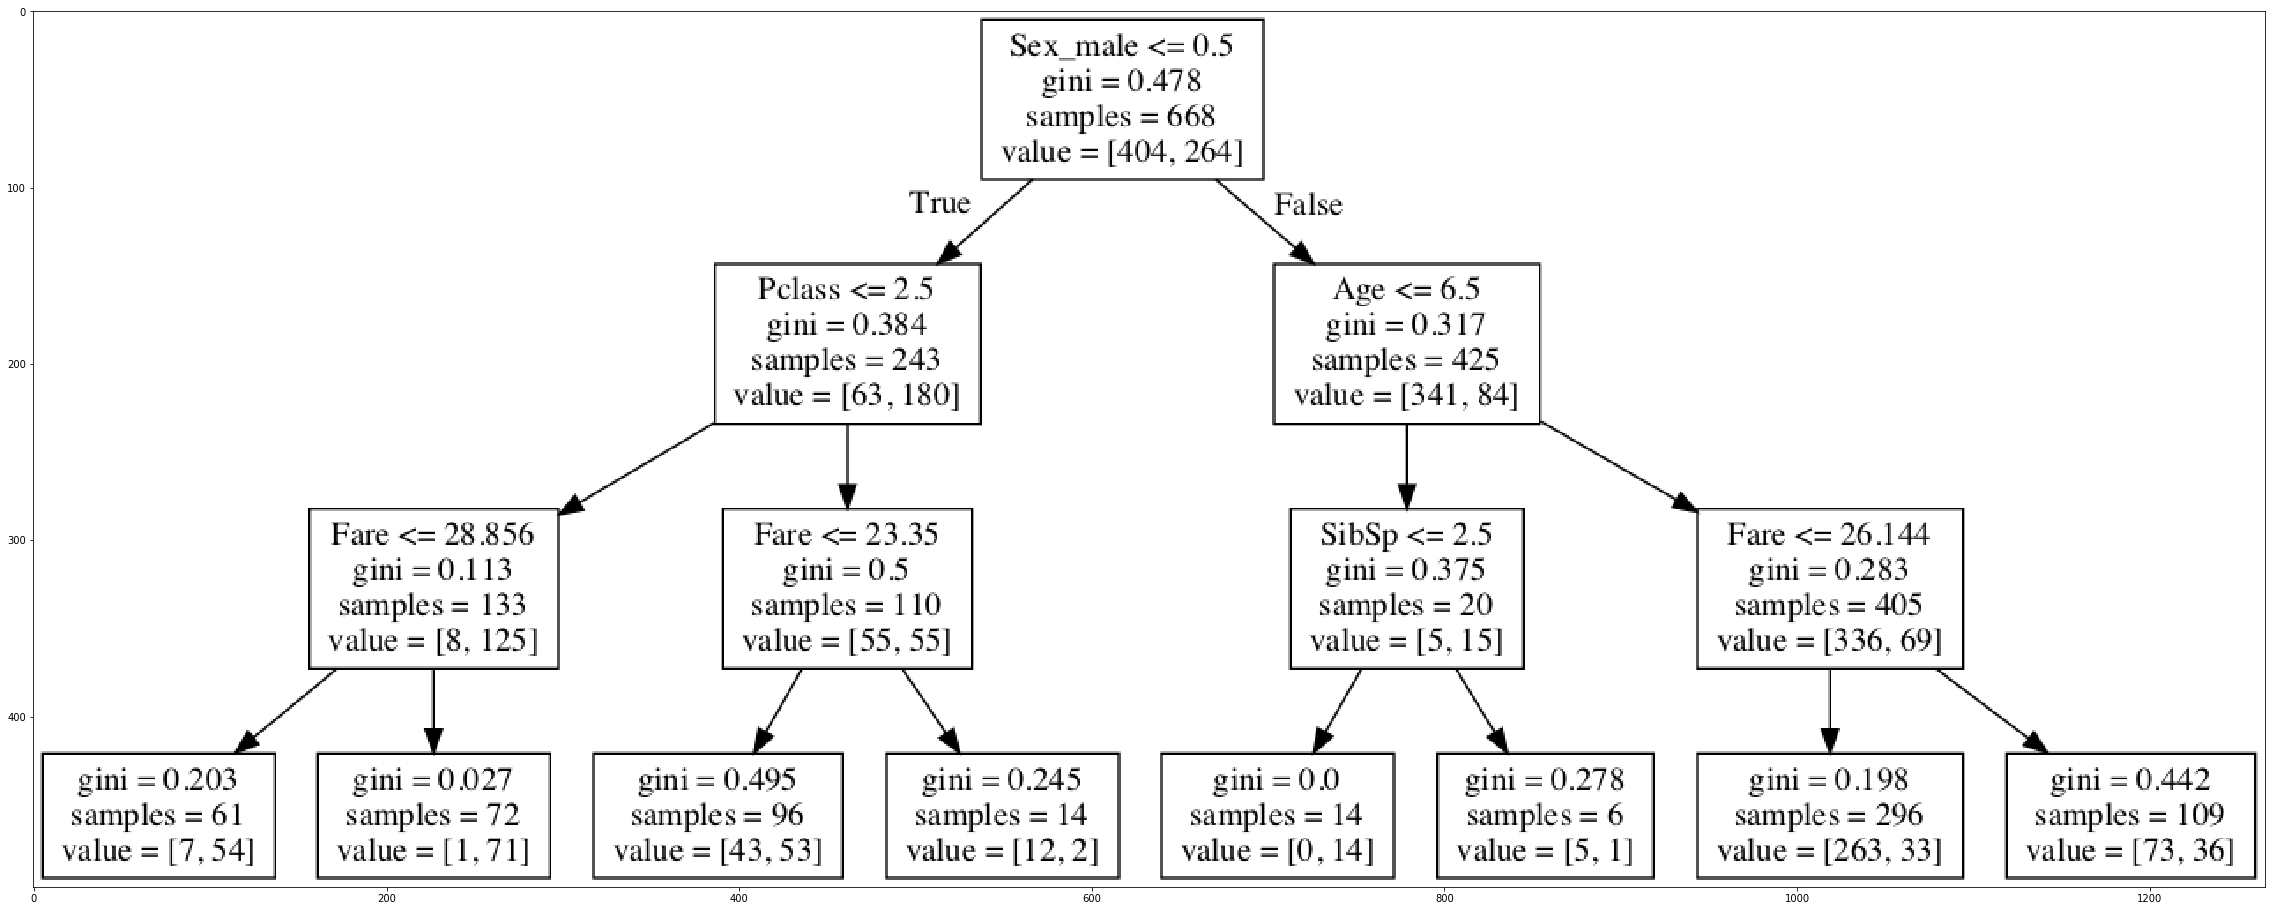

In [31]:
# Show the PNG
# /scrub/
tree_image = plt.imread(png_path)
fig, ax = plt.subplots(figsize=(40, 40))
ax.imshow(tree_image);

A decision tree classifier works just like a decision tree regressor except that at each leaf node **it predicts the class that was most common in the training set for that leaf node**.

**Notice**: The model looks at age first for males but not for females, perhaps because "women and children" were given priority for life boats, so that age mattered greatly for males but not females. **The fact that the significance of age depends on sex is an example of an interaction effect.**

**Exercise (1 min.)**

- What outcome would the model predict for a 9-year-old male with one sibling?

/scrub/

Survived

- What outcome would the model predict for a third-class female who paid a fare of 25?

/scrub/

Did not survive.

$\blacksquare$

## Visualizing Decision Tree Regression

Suppose we wanted to predict Major League Baseball salaries from 1986–87 using the following data set.

- **Years** (x-axis): Number of years playing in the major leagues.
- **Hits** (y-axis): Number of hits in the previous year.
- **Salary** (color): Low salary is blue/green, high salary is red/yellow.

![Salary data](../assets/images/salary_color.png)

If you plotted these data in three dimensions, with salary corresponding to height, *linear regression* would find the plane that goes through the heart of the data (minimizes the sum of squared distances from the data points).

A **regression tree** takes a different approach. It breaks the 2D plane shown into boxes, and then predicts the average value within a segment for every point in that segment.

For instance, it might start with a vertical line that separates most of the purple points from the rest:

![](../assets/images/salary_color_split1.png)

Next it might split between veterans with high and low numbers of hits:

![](../assets/images/salary_color_split2.png)

We could keep going to carve our feature space up into more boxes. Using height to represent our model's predictions, **a decision tree regression model gives you "stair steps"** where linear regression gives a plane.

![](../assets/images/tree_3d_plot.png)

Here is another way to visualize the model:

![Salary tree annotated](../assets/images/salary_tree_annotated.png)

The first split is **years < 4.5**, thus that split goes at the top of the tree. When a splitting rule is **true**, you follow the left branch. When a splitting rule is **false**, you follow the right branch.

For players in the **left branch**, the mean salary is 166,000, thus you label it with that value. (Salary has been divided by 1,000 and log-transformed to 5.11.)

For players in the **right branch**, there is a further split on **hits < 117.5**, dividing players into two more salary regions: 403,000 (transformed to 6.00), and 846,000 (transformed to 6.74).

**Note:** Years and hits are both integers, but the convention is to use the **midpoint** between adjacent values to label a split.

**Model summary:**

- $R_1$: Players with **less than 5 years** of experience earn a mean salary of **\$166,000** ($= \$1000 \times e^{5.11}$).
- $R_2$: Players with **5 or more years** of experience and **less than 118 hits** earn a mean salary of **\$403,000**.
- $R_3$: Players with **5 or more years** of experience and **118 hits or more** earn a mean salary of **\$846,000**.

This tree provides insights about the data:

- Years is the most important single factor determining salary, with a lower number of years corresponding to a lower salary.
- For a player with a lower number of years, hits is not an important factor in determining salary.
- For a player with a higher number of years, hits is an important factor in determining salary, with a greater number of hits corresponding to a higher salary.

## Building a Decision Tree

### By Hand

In [32]:
vehicle_prices_path = '../assets/data/vehicles_train.csv'
vehicle_prices = pd.read_csv(vehicle_prices_path)
vehicle_prices

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [33]:
# Encode car as 0 and truck as 1.
# /scrub/
vehicle_prices.loc[:, 'is_truck'] = vehicle_prices.loc[:, 'vtype'].map({'car':0, 'truck':1})
vehicle_prices = vehicle_prices.drop('vtype', axis='columns')

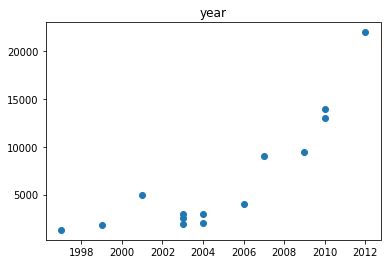

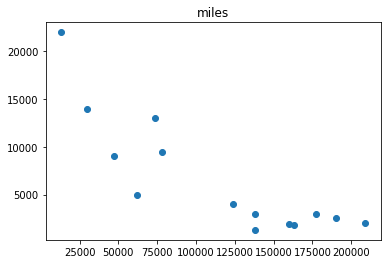

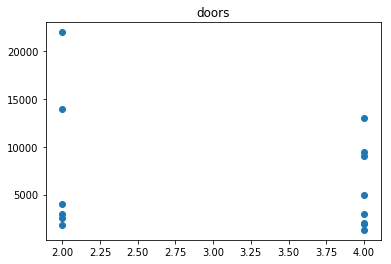

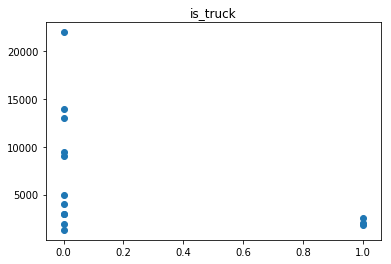

In [34]:
# Make a scatter plot of vehicle price against each feature
# /scrub/
y = vehicle_prices.loc[:, 'price']
for var in ['year', 'miles', 'doors', 'is_truck']:
    x = vehicle_prices.loc[:, var]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(var)

Let's split first on year < 2006.5

**Exercise (10 mins., in pairs).** Continue to build a decision tree for this problem "by hand."

**Note:** You wouldn't typically develop a decision tree by hand. The purpose of this exercise is to help develop an understanding of what the computer does when it fits a decision tree.

- Split your DataFrame into two separate DataFrames according to your first splitting rule.

In [35]:
# Here is the first split
vehicle_prices_old = vehicle_prices.loc[vehicle_prices.loc[:, 'year'] < 2006.5, :]

In [36]:
# Create `vehicle_prices_new` by modifying the code above.
# /scrub/
vehicle_prices_new = vehicle_prices.loc[vehicle_prices.loc[:, 'year'] > 2006.5, :]

- Within the `vehicle_prices_old` DataFrames, repeat the plots above, decide which feature you think is the most important predictor, and use it to choose an additional splitting rule. (You can use the original feature a second time. It is not necessary actually to split the DataFrame, but only to say how you would split it.)

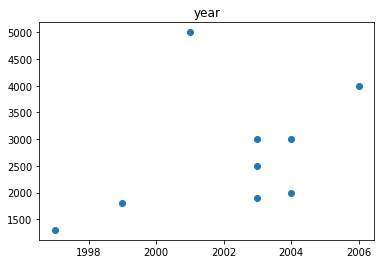

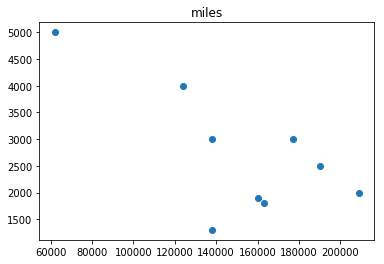

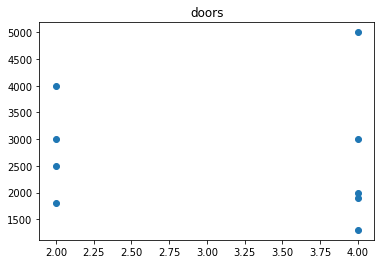

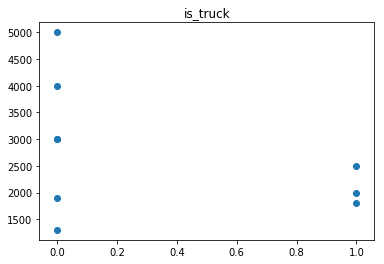

In [37]:
# /scrub/
y = vehicle_prices_old.loc[:, 'price']
for var in ['year', 'miles', 'doors', 'is_truck']:
    x = vehicle_prices_old.loc[:, var]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(var)

/scrub/

For old vehicles, I will split next on car vs. truck.

- Within the `vehicle_prices_new` DataFrames, repeat the plots above, decide which feature you think is the most important predictor, and use it to choose an additional splitting rule. (You can use the original feature a second time. It is not necessary actually to split the DataFrame, but only to say how you would split it.)

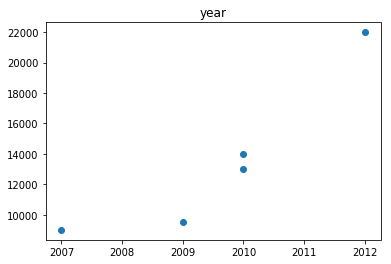

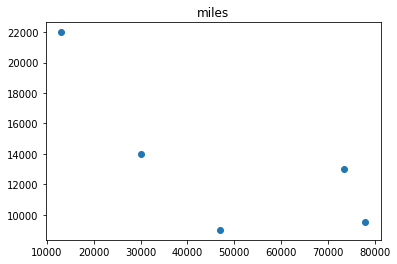

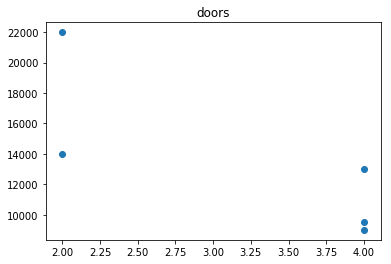

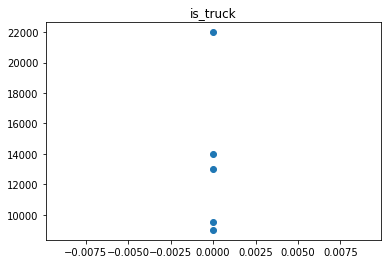

In [38]:
# /scrub/
y = vehicle_prices_new.loc[:, 'price']
for var in ['year', 'miles', 'doors', 'is_truck']:
    x = vehicle_prices_new.loc[:, var]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(var)

/scrub/

For new vehicles, I will split next on doors < 3.

- Draw a diagram of your tree, labeling the leaves with the mean price for the observations in that region. Make sure nothing is backwards: You follow the **left branch** if the rule is true and the **right branch** if the rule is false. You can either use some kind of drawing program on your computer or draw on paper and take a picture.

In [39]:
# /scrub/
print(vehicle_prices_old.loc[vehicle_prices_old.loc[:, 'is_truck'] == 1, 'price'].mean())
print(vehicle_prices_old.loc[vehicle_prices_old.loc[:, 'is_truck'] == 0, 'price'].mean())
print(vehicle_prices_new.loc[vehicle_prices_new.loc[:, 'doors'] == 2, 'price'].mean())
print(vehicle_prices_new.loc[vehicle_prices_new.loc[:, 'doors'] == 4, 'price'].mean())

2100.0
3033.3333333333335
18000.0
10500.0


/scrub/

![](../assets/images/vehicle_price_tree.jpeg)

$\blacksquare$

### By Computer

**Ideal approach:** Consider every possible partition of the feature space.

**Problem:** Too many possibilities to consider.

**"Good enough" approach:** Recursive binary splitting.

1. Begin at the top of the tree.
2. For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint so that the resulting tree has the lowest possible error according to some metric (usually MSE for regression and error rate or "Gini index" for classification). Make that split.
3. Examine the two resulting regions. Once again, make a **single split** (in one of the regions) to minimize the MSE.
4. Keep repeating Step 3 until a **stopping criterion** is met:
    - Maximum tree depth (maximum number of splits required to arrive at a leaf).
    - Minimum number of observations in a leaf.

This approach is a **greedy algorithm** because it makes *locally optimal* decisions -- it takes the best split at each step. Greedy algorithms typically are not optimal, but they are often good enough and relatively easy to compute.

**Analogy:**
- Always eating cookies to maximize your immediate happiness (greedy) might not lead to optimal overall happiness.
- In our case, reorganizing parts of the tree already constructed based on future splits might result in a better model overall. 

#### Demo: Choosing the Ideal Cutpoint for a Given Feature

Let's find the mileage cutpoint that gives the largest reduction in MSE, just like the decision tree regressor `fit` method would do.

In [40]:
# Before splitting anything, just predict the mean of the entire data set.
# /scrub/
vehicle_prices.loc[:, 'prediction'] = vehicle_prices.loc[:, 'price'].mean()
vehicle_prices

,price,year,miles,doors,is_truck,prediction
0,22000,2012,13000,2,0,6571.428571
1,14000,2010,30000,2,0,6571.428571
2,13000,2010,73500,4,0,6571.428571
3,9500,2009,78000,4,0,6571.428571
4,9000,2007,47000,4,0,6571.428571
5,4000,2006,124000,2,0,6571.428571
6,3000,2004,177000,4,0,6571.428571
7,2000,2004,209000,4,1,6571.428571
8,3000,2003,138000,2,0,6571.428571
9,1900,2003,160000,4,0,6571.428571


In [41]:
# Calculate RMSE for those predictions.
# /scrub/
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(vehicle_prices.loc[:, 'price'], vehicle_prices.loc[:, 'prediction']))

5936.981985995983

In [42]:
# Define a function that calculates the RMSE for a given split of miles.
# /scrub/
def mileage_split(miles):
    low_mileage_vehicles = vehicle_prices.loc[vehicle_prices.loc[:, 'miles'] < miles, :]
    high_mileage_vehicles = vehicle_prices.loc[vehicle_prices.loc[:, 'miles'] >= miles, :]
    
    predicted_price_low_miles = low_mileage_vehicles.loc[:, 'price'].mean()
    predicted_price_high_miles = high_mileage_vehicles.loc[:, 'price'].mean()
    
    vehicle_prices.loc[:, 'prediction'] = (
        np.where(vehicle_prices.loc[:, 'miles'] < miles, predicted_price_low_miles, predicted_price_high_miles)
    )
    
    mse = metrics.mean_squared_error(vehicle_prices.loc[:, 'price'], vehicle_prices.loc[:, 'prediction'])
    rmse = np.sqrt(mse)
    return rmse

In [43]:
# Calculate RMSE for tree that splits on miles < 50,000.
# /scrub/
print('RMSE:', mileage_split(50000))
vehicle_prices

RMSE: 3984.0917425414564


,price,year,miles,doors,is_truck,prediction
0,22000,2012,13000,2,0,15000.000000
1,14000,2010,30000,2,0,15000.000000
2,13000,2010,73500,4,0,4272.727273
3,9500,2009,78000,4,0,4272.727273
4,9000,2007,47000,4,0,15000.000000
5,4000,2006,124000,2,0,4272.727273
6,3000,2004,177000,4,0,4272.727273
7,2000,2004,209000,4,1,4272.727273
8,3000,2003,138000,2,0,4272.727273
9,1900,2003,160000,4,0,4272.727273


In [44]:
# Calculate RMSE for tree that splits on miles < 100,000.
# /scrub/
print('RMSE:', mileage_split(100000))
vehicle_prices

RMSE: 3530.146530076269


,price,year,miles,doors,is_truck,prediction
0,22000,2012,13000,2,0,12083.333333
1,14000,2010,30000,2,0,12083.333333
2,13000,2010,73500,4,0,12083.333333
3,9500,2009,78000,4,0,12083.333333
4,9000,2007,47000,4,0,12083.333333
5,4000,2006,124000,2,0,2437.500000
6,3000,2004,177000,4,0,2437.500000
7,2000,2004,209000,4,1,2437.500000
8,3000,2003,138000,2,0,2437.500000
9,1900,2003,160000,4,0,2437.500000


In [45]:
# Check all possible mileage splits.
# /scrub/
mileage_range = list(range(vehicle_prices.loc[:, 'miles'].min(), vehicle_prices.loc[:, 'miles'].max(), 1000))
RMSE = [mileage_split(miles) for miles in mileage_range]

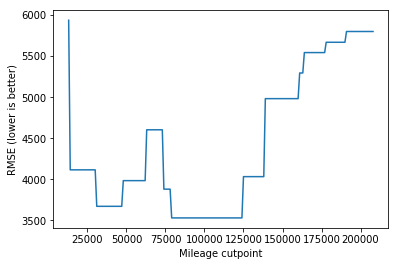

In [46]:
# Plot mileage cutpoint (x-axis) versus RMSE (y-axis).
# /scrub/
fig, ax = plt.subplots()
ax.plot(mileage_range, RMSE)
ax.set_xlabel('Mileage cutpoint')
ax.set_ylabel('RMSE (lower is better)');

Before every split, the computer repeats this process for every feature and chooses the feature and cutpoint that produce the lowest MSE.

## Tuning a Decision Tree

- **On the left:** A regression tree for salary that is **grown deeper**.
- **On the right:** A comparison of the **training, testing, and cross-validation errors** for trees with different numbers of leaves.

![Salary tree grown deep](../assets/images/salary_tree_deep.png)

The **training error** continues to go down as the tree size increases (due to overfitting), but the lowest **cross-validation error** occurs for a tree with a depth of three.

Note that if we make a **complete tree** (where every data point is boxed into its own region), then we will achieve perfect training accuracy. However, then outliers in the training data will greatly affect the model.

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [47]:
# Try different values one by one.
# /scrub/
from sklearn.model_selection import cross_val_score

X = vehicle_prices.drop('price', axis='columns')
y = vehicle_prices.loc[:, 'price']

treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3333.829365079365

In [48]:
# Use a loop to try a range of values
# /scrub/

# List of values to try:
max_depth_range = list(range(1, 8))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

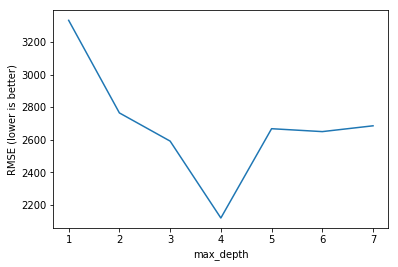

In [49]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
# /scrub/
fig, ax = plt.subplots()
ax.plot(max_depth_range, RMSE_scores);
ax.set_xlabel('max_depth');
ax.set_ylabel('RMSE (lower is better)');

In [50]:
# max_depth=3 was best, so fit a tree using that parameter.
# /scrub/
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

Logistic regression on $X_1$ and $X_2$ yields a straight-line decision boundary, while a decision tree yields boxes. Which one is better depends on the relationship between the features and the response:

## Additional Practice

**Exercise (12 mins., in groups).**

This time we will leave it up to you whether to work together or individually. We will put you in breakout rooms so that you can help each other as needed.

- Create a regression tree for the "hitters" data using the features "hits" and "years" and the target "salary". Train it and get its MSE on the entire data set (with no train/test split). Discard any rows with missing data.

In [51]:
hitters_path = '../assets/data/hitters.csv'

In [52]:
# /scrub/
hitters = pd.read_csv(hitters_path)

In [53]:
# /scrub/
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [54]:
# /scrub/
hitters = hitters.dropna()

In [55]:
# /scrub/
X = hitters.loc[:, ['Years', 'Hits']]
y = hitters.loc[:, 'Salary']

In [56]:
# /scrub/
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
y_pred = dtr.predict(X)

metrics.mean_squared_error(y, y_pred)

273.8141634980989

- How might discarding rows with missing data generate bias? How big of an issue do you think that is in this case? How else could we handle the missing data?

/scrub/

Discarding rows with missing salary data will create bias if that data is not missing completely at random. For instance, it may be that players with greater salaries tend to go to greater lengths to concel those salaries.

This issue could be fairly substantial in this case, because a fairly large proportion of the salaries (~20%) are missing and it is plausible that they are MNAR (missing not at random).

Another option is to **impute** the data, e.g. using the mean or median salaray or inferring the salary from other variables.

- Train your model and calculates its MSE in five-fold cross-validation.

In [57]:
# /scrub/
from sklearn.model_selection import KFold

# Using KFold object rather than cv=5 so that we can shuffle
kf = KFold(5, shuffle=True)
np.mean(-cross_val_score(dtr, X, y, cv=kf, scoring='neg_mean_squared_error'))

214840.13842854463

- **BONUS:** Change your model to reduce cross-validation MSE.

*Possible approaches:*

- Change the `max_depth` of your tree.
- Change [other hyperparameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).
- Change the set of features you use.
- Do some "feature engineering:"
    - Dummy-code categorical features to make them usable.
    - Create new features by transforming or combining existing features (e.g. calculate batting averages or other rates). Note that a **monotonic transformation** that doesn't change the orders of the values (e.g. taking a non-negative variable to a power) doesn't make any difference to a decision tree because it can simply move its cutpoints accordingly.

*Advice:*

- Compare training-set performance to test-set performance to decide whether to make your model more or less complicated.
- Plot your data to guide your feature selection and feature engineering efforts.
- Look for natural feature transformations (e.g. calculating rates per at-bat) that might improve both the bias and the variance of your model.

$\blacksquare$

## Comparing Decision Trees With Other Models

- Left: Logistic regression decision boundary
- Right: Decision tree decision boundary

Green and yellow indicate the true classes.

![Trees versus linear models](../assets/images/tree_vs_linear.png)

**Advantages of decision trees:**

- They can be used for regression or classification.
- They can be displayed graphically.
- They are highly interpretable.
- They can be specified as a series of rules, and more closely approximate human decision-making than other models.
- Prediction is fast.
- Their features don't need scaling.
- They automatically learn feature interactions.
- Tends to ignore irrelevant features.
- They are non-parametric -- as a result, they will outperform linear models if the relationship between features and response is highly non-linear.

**Disadvantages of decision trees:**

- Their performance is (generally) not competitive with the best supervised learning methods.
- They can easily overfit the training data (tuning is required).
- Recursive binary splitting makes "locally optimal" decisions that may not result in a globally optimal tree.
- They don't tend to work well if the classes are highly unbalanced.
- They don't tend to work well with very small data sets.